Задачи
1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
2. Выясните, какой пользователь купил больше всего товаров. 
3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
4. Визуализируйте продажи по дням.
5. Сколько пользователей приобрели какой-либо товар повторно? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Для начала импортируем необходимые библиотеки

In [6]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

Далее необходимо написать скрипт для объединения информации из разных файлов в один датафрейм.

In [7]:
way_to_date = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-gorbunova/shared/homeworks/python_ds_miniprojects/4/data/'

In [8]:
date = os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-gorbunova/shared/homeworks/python_ds_miniprojects/4/data/')

In [9]:
name = ''
df = pd.DataFrame()
for i in date:
    name = way_to_date + i
    names = os.listdir(name)
    for j in names:
        final = name+'/'+j
        finals = os.listdir(final)
        for k in finals:
            df1 = pd.read_csv(final + '/' + k,index_col=0)
            df1['date'] = name.split('/')[-1]
            df1['name'] = final.split('/')[-1]
            df = pd.concat([df,df1])

        

In [10]:
df 

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...
0,18,4,2020-12-07,Petr_Fedorov
1,94,4,2020-12-07,Petr_Fedorov
0,95,2,2020-12-07,Vasiliy_Ivanov
1,83,3,2020-12-07,Vasiliy_Ivanov


### Выясните, какой пользователь купил больше всего товаров.

In [13]:
df.groupby('name').agg({'quantity':'sum'}).sort_values(by='quantity', ascending=False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


Таким образом, пользователи Alexey_Smirnov и Petr_Smirnov купили больше всего товаров.

### Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

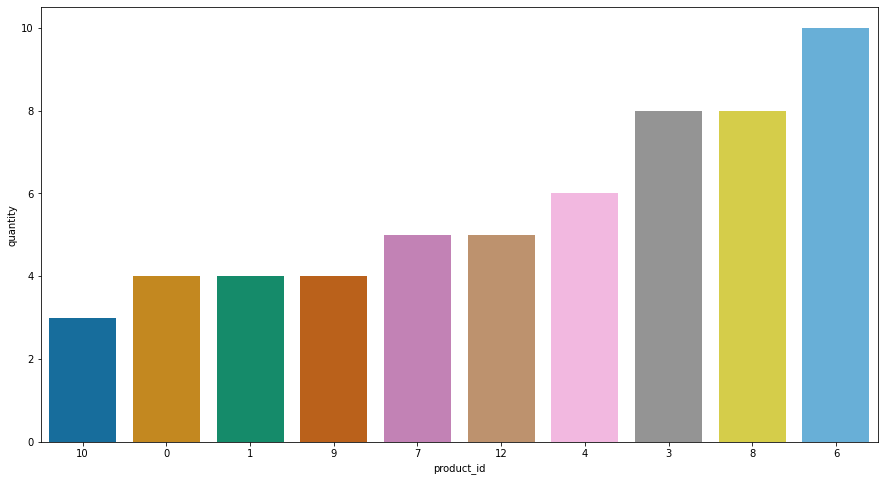

In [17]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'product_id', y = 'quantity', data = df.groupby('product_id', as_index=False).agg({'quantity':'sum'}).head(10),
           order = df.groupby('product_id', as_index=False).agg({'quantity':'sum'}).head(10).sort_values('quantity').product_id,
           palette = 'colorblind')

### Визуализируйте продажи по дням.

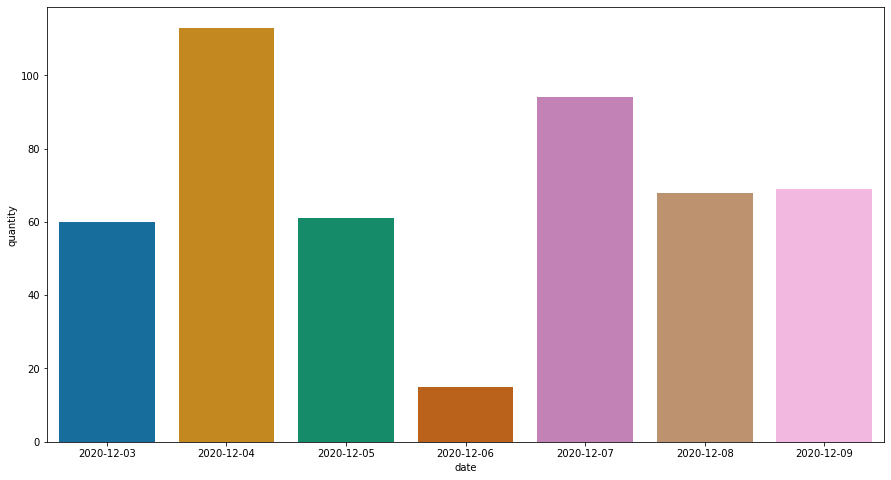

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'date', y = 'quantity', data = df.groupby('date', as_index=False).agg({'quantity':'sum'}),
           palette = 'colorblind')

### Сколько пользователей приобрели какой-либо товар повторно?

In [79]:
df.groupby(['name','product_id'], as_index=False).agg({'date':'count'}).query('date>1')

,name,product_id,date
30,Alexey_Smirnov,55,2
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


Таким образом, повторно совершили покупку трое представленных пользователей.